<a href="https://colab.research.google.com/github/Ketian-Wang/RobotLearning/blob/main/benchmark_version_mece6616_Spring2023_Project5_kw3019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Setup


In [ ]:
# DO NOT CHANGE

# After running this cell, the folder 'mecs6616_sp23_project3' will show up in the file explorer on the left (click on the folder icon if it's not open)
# It may take a few seconds to appear
!git clone https://github.com/roamlab/mecs6616_sp23_project5.git

Cloning into 'mecs6616_sp23_project5'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 43 (delta 19), reused 23 (delta 7), pack-reused 0
Unpacking objects: 100% (43/43), 13.83 KiB | 566.00 KiB/s, done.


In [ ]:
# DO NOT CHANGE

# copy all needed files into the working directory. This is simply to make accessing files easier
!cp -av /content/mecs6616_sp23_project5/* /content/

'/content/mecs6616_sp23_project5/arm_dynamics_base.py' -> '/content/arm_dynamics_base.py'
'/content/mecs6616_sp23_project5/arm_dynamics.py' -> '/content/arm_dynamics.py'
'/content/mecs6616_sp23_project5/arm_env.py' -> '/content/arm_env.py'
'/content/mecs6616_sp23_project5/geometry.py' -> '/content/geometry.py'
'/content/mecs6616_sp23_project5/render.py' -> '/content/render.py'
'/content/mecs6616_sp23_project5/robot.py' -> '/content/robot.py'
'/content/mecs6616_sp23_project5/score.py' -> '/content/score.py'


In [ ]:
# DO NOT CHANGE

# There will be error messages from this command. You can ignore those error messages 
# as long as you see "Successfully installed setuptools-65.5.0" at the end.

!pip install setuptools==65.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
cvxpy 1.3.1 requires setuptools>65.5.1, but you have setuptools 65.5.0 which is incompatible.


In [ ]:
# DO NOT CHANGE

# There will be error messages from this command. You can ignore those error messages 
# as long as you see "Successfully installed gym-0.21.0 stable-baselines3-1.5.0" at the end.

!pip install gym==0.21.0 stable-baselines3==1.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 kB 2.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gym
  Running setup.py clean for gym
Failed to build gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
  Running setup.py install for gym ... done
  DEPRECATION: gym was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. pip 23.1 will enforce this behaviour change. A possible replacement

# Part 1: Implement DQN

This part will implement DQN from scratch. This section will NOT use any RL libraries.

## Starter Code Explanation
In addition to code that have been used from the previous project (i.e. arm dynamics, etc.) an "Environment" is provided in the `ArmEnv` class. The environment "wraps around" the arm dynamics and provides the key functions that an RL algorithm expects: reset(...) and step(...). The implementation of `ArmEnv` follows the [OpenAI Gym](https://www.gymlibrary.dev/api/core/) API standard. It is a standard that is accepeted by many RL libraries and allows for our problem to be easily solved with various RL libraries. Take a moment to familiarize yourself with these functions! See [here](https://www.gymlibrary.dev/api/core/) for more information on the definition of the reset(...) and step(...) functions.

Important notes:

* The ArmEnv expects an action similar to the one used previously: a vector with a torque for every arm joint. Thus, the native action space for this environment is high-dimensional, and continuous. DQN will require an action space that is 1-dimensional and discrete. You will need to convert between these. For example, you can have an action space of [0, 1, 2,] where each number just represents the identity of an action candidate, and a conversion dictionary {0: [-0.1, -0.1], 1: [0.1, 0.1], 2: [0, 0]}. Then, when the Q network output an action 1, it will be converted into [0.1, 0.1] and used by the environment. Note that this is just an example method to implement the conversion and you do not have to follow the same procedure.
* The observation provided by the environment will comprise the same state vector as before, to which we append the current position of the end_effector and the goal for the end-effector. Since your policy must learn to reach arbitrary goals, the goal must be provided as part of the observation. So the observation will consist of 8 values: 4 for the state, 2 for the pos_ee and 2 for the goal.
* The maximum episode length of the environment is 200 steps. Each step is simulated for 0.01 second. This should be used for both training and testing.
* The reward function of this environment is by default r(s, a) = - dist(pos_ee, goal)^2 where represents the negative square of L2 distance between the current position of the end-effector and the goal position.

### Arm Environment Example
It is encouraged to view the `arm_env.py` file to understand the `random_goal()`, `reset()` and `step()`  functions but do not modify the file.

The `env.reset()` method, will reset the arm in the vertically downwards position and set a new random goal by calling the `random_goal()` method. By understanding how the goals are set you could guide your training in that direction. You can also provide your own goal as a (2,1) array to the reset function as an argument. This could come handy later when training the model.

The `env.step()` function takes an action as a (2,1) shaped array and outputs the next observation, reward, done and info. `info` is a dictionary with pos_ee and vel_ee values. This can come handy if you attempt to do some reward engineering.

The cell below provides an example of random policy interacting with the ArmEnv for 50 steps (0.5 seconds)

In [ ]:
from render import Renderer
from arm_env import ArmEnv
from robot import Robot
from arm_dynamics import ArmDynamics
import numpy as np

# DO NOT CHANGE arm parameters
arm = Robot(
        ArmDynamics(
            num_links=2,
            link_mass=0.1,
            link_length=1,
            joint_viscous_friction=0.1,
            dt=0.01,
	    			gravity=False	    
        )
    )
arm.reset()
# ------------------

env = ArmEnv(arm, gui=False)

# Passing our own defined goal to the reset function
# goal = np.array([[0.5], [-1.5]])
obs = env.reset()
goal = env.goal
print(goal)

# Resetting the environment without the goal will set a random goal position
# obs = env.reset()

for i in range(1):
  rand_action = [0.1, 0.05]
  obs, reward, done, info = env.step(rand_action)
  state = env.get_obs()
  # print(state)
  test_reward = np.linalg.norm(info['pos_ee'] - goal) ** 2
  # print(i)
  # print('done', done)
  # print('reward', reward)
  # print('test_reward', test_reward)

[[ 0.40045932]
 [-1.65265665]]


### QNetwork
This class defines the architecture of the network.

The action space should be discrete, with whatever cardinality you decide. The size of the output layer of your Q-Network should thus be the same as the cardinality of your action space. When selecting an action, a policy must choose the one that has the highest estimated Q-value for the current state. As part of the QNetwork class, we are providing the function select_discrete_action(...) which does exactly that.

The arm environment itself however expects a 2-dimensional, continuous action vector. Therefore, when it comes to send an action to the environment, the kind of action the environment expects will be provided. 
This section will determine how to convert between the discrete action space of the Q-Network and the continuous action space of the arm. The step function of the environment like this:

```
self.env.step(self.q_network.action_discrete_to_continuous(discrete_action))
```

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
random.seed(0)

class QNetwork(nn.Module):
    def __init__(self, env):
        super(QNetwork, self).__init__()
        
        # torque_range_1 = np.arange(-1, 1.5, 0.5)
        # torque_range_2 = np.arange(-0.5, 0.75, 0.25)
        # torque_combinations = [np.array([torque_1, torque_2]) for torque_1 in torque_range_1 for torque_2 in torque_range_2]
        # # random.shuffle(torque_combinations)

        # action_mapping = {}
        # for action_idx, torque_pair in enumerate(torque_combinations):
        #     action_mapping[action_idx] = torque_pair
        self.action_mapping = {0: [0, 0],
                               1: [-2, -2], 
                               2: [2, -2], 3: [-2, 2], 4: [2, 2], 
                               5: [-0.05, -0.025], 6: [0.05, -0.025], 
                               7: [-0.05, 0.025], 8: [0.05, 0.025]}

        self.obs_dim = env.observation_space.shape[0]
        self.action_dim = len(self.action_mapping)
        
        self.fc1 = nn.Linear(self.obs_dim, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, self.action_dim)



    def forward(self, x, device):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def select_discrete_action(self, obs, device):
        # Put the observation through the network to estimate q values for all possible discrete actions
        obs = torch.Tensor(obs)
        est_q_vals = self.forward(obs.reshape((1,) + obs.shape), device)
        # Choose the discrete action with the highest estimated q value
        discrete_action = torch.argmax(est_q_vals, dim=1).tolist()[0]
        return discrete_action

    def action_discrete_to_continuous(self, discrete_action):
        continuous_action = self.action_mapping[discrete_action]
        return continuous_action


The code to use the replay buffer in your RL implementation is provided. The ReplayBuffer class do not need to be changed.
```
rb = ReplayBuffer()
```
After creating a ReplayBuffer object you can add samples in the buffer using `put()`:
```
rb.put((obs, action, reward, next_obs, done))
```
Take random samples from the buffer using:
```
obs, actions, rewards, next_obses, dones = rb.sample(batch_size)
```


In [ ]:
import collections
import random
import numpy as np


class ReplayBuffer():
    def __init__(self, buffer_limit):
        self.buffer = collections.deque(maxlen=buffer_limit)

    def put(self, transition):
        self.buffer.append(transition)

    def sample(self, n):
        mini_batch = random.sample(self.buffer, n)
        s_lst, a_lst, r_lst, s_prime_lst, done_mask_lst = [], [], [], [], []

        for transition in mini_batch:
            s, a, r, s_prime, done_mask = transition
            s_lst.append(s)
            a_lst.append(a)
            r_lst.append(r)
            s_prime_lst.append(s_prime)
            done_mask_lst.append(done_mask)

        return np.array(s_lst), np.array(a_lst), \
               np.array(r_lst), np.array(s_prime_lst), \
               np.array(done_mask_lst)

### TrainDQN
Here, you must fill in the train(...) function that actually trains your network. 

We are providing a helper function called save_model(...) that will save the current Q-network. Use this as you see fit.

To set one network equal to another one, you can use code like this:
```
target_network.load_state_dict(self.q_network.state_dict())
```

If you would like to be graded with a specific seed for the random number generators, make sure to change the default seed in the initialization of the TrainDQN class.

The time taken to train the model will depend mainly on how big is your model architecture and the number of episodes you run the training for. As a reference, the time taken to train a model on 1500 episodes, which passed all evaluation metrics was about an hour.
* Reference value for clipping the gradient value as mentioned in class: 0.2
* Reference value for a typical size of Replay Buffer: >10k
* Reference value for batch size while training: 64 - 512

Note that these are just reference values and larger is not always better as it may slow things down.

It is good practice in RL to ensure simpler things are working before complicating environments or training techniques.

If you think your training method is not working at all, you could pass a fixed goal to the `env.reset()` method during the training loop to ensure that your model is learning.

In [ ]:

import time
from render import Renderer
from arm_env import ArmEnv
import numpy as np
from math import dist
import os
import torch
import torch.optim as optim
import seaborn as sns


class TrainDQN:


    def __init__(self, env, seed=0):
        np.random.seed(seed)
        torch.manual_seed(seed)
        torch.backends.cudnn.deterministic = False
        self.env = env
        self.device = torch.device('cpu')
        self.q_network = QNetwork(env).to(self.device)
        self.target_network = QNetwork(env).to(self.device)
        self.target_network.load_state_dict(self.q_network.state_dict())

        self.env.seed(seed)
        self.env.observation_space.seed(seed)

        self.num_action = 9

        self.epsilon = 0.8
        self.epsilon_dacay = 0.95
        self.epsilon_min = 0.2

        self.replay_buffer = ReplayBuffer(10000)
        
        self.batch_size = 128
        self.gamma = 0.95
        self.criterion = nn.MSELoss()
        self.lr = 0.001
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=self.lr)
        self.num_episodes = 500

        self.q_update_num = 5


    def to_tensor(self, states, action_indexs, rewards, next_states):
        states = torch.from_numpy(states).float()
        action_indexs = torch.from_numpy(action_indexs).long()
        rewards = torch.from_numpy(rewards).float()
        next_states = torch.from_numpy(next_states).float()
        return states, action_indexs, rewards, next_states

    def train_batch(self):
        self.optimizer.zero_grad()
        states, action_indexs, rewards, next_states, dones = self.replay_buffer.sample(self.batch_size)
        states, action_indexs, rewards, next_states = self.to_tensor(states, action_indexs, rewards, next_states)

        q_a = self.q_network.forward(states, self.device).gather(1, action_indexs.view(-1, 1)).squeeze()

        q_t = self.target_network.forward(next_states, self.device)

        q_t_max = torch.max(q_t.detach(), dim=1)[0]
        q_tar = rewards + self.gamma * q_t_max

        loss = self.criterion(q_a, q_tar)
        loss.backward()

        # clamp
        for para in self.q_network.parameters():
            para.grad.data.clamp_(-0.05, 0.05)
        
        self.optimizer.step()
        
        return loss.item()

    def get_reward(self, target_goal, info):

      positiona_error = np.linalg.norm(info['pos_ee'] - target_goal)
      reward_temp = - positiona_error ** 2
      if positiona_error < 0.3:
         reward_temp += 10
        # print('positiona_error', positiona_error)
      if positiona_error < 0.1:
         reward_temp += 10
      #   # print('positiona_error', positiona_error)
      # elif positiona_error < 0.1:
      #   reward_temp += 10
      #   # print('positiona_error', positiona_error)
      # elif positiona_error < 0.05:
      #   reward_temp += 10
      #   # print('wowowo_positiona_error', positiona_error)


      return reward_temp


    def train(self):
        best_reawrd = -np.inf
        deacied_epsilon = self.epsilon
        loss_history = []
        reward_history = []
        for episode in range(self.num_episodes):

            # goal = np.array([[0.5], [-1.5]])
            episode_reward = 0
            state = self.env.reset()
            # print(state)
            target_goal = self.env.goal
            # print(target_goal)
            loss = 0

            deacied_epsilon = np.max([self.epsilon_min, deacied_epsilon * self.epsilon_dacay])
            # print(deacied_epsilon)
            while True:            
                
                if random.random() < deacied_epsilon:
                    index = np.random.randint(0, self.num_action)
                else:
                    index = self.q_network.select_discrete_action(state, self.device)

                action = self.q_network.action_discrete_to_continuous(index)

                state_next, reward, done, info = self.env.step(action)
                if done:
                    break

                self.replay_buffer.put((state, index, reward, state_next, done))
   
                reward_temp = self.get_reward(target_goal, info)
                
                episode_reward += reward_temp

                if len(self.replay_buffer.buffer) >= 1000:
                    loss += self.train_batch()
                state = state_next

            if episode % self.q_update_num == 0:
                self.target_network.load_state_dict(self.q_network.state_dict()) # update num
                self.save_model(episode)


            
            loss_history.append(loss)

            # print('loss', loss)
            reward_history.append(episode_reward)
            # if episode_reward > best_reawrd:
            #   best_reawrd = episode_reward
            #   print("Episode:", episode, "  reward:", episode_reward)
            #   self.save_model(episode)
            
            # if episode > (self.num_episodes - 10):
            #   print("Episode:", episode, "  reward:", episode_reward)
            #   self.save_model(episode)
            
            # if episode % 5 == 0:
            #   self.save_model(episode)
            
            # if episode_reward < 1500:
            #   print('bad point', target_goal)
            #   print("Episode:", episode, "  reward:", episode_reward)
            
        return loss_history, reward_history





    def save_model(self, episode_num, save_dir='models'):
        
        timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
        model_dir = os.path.join(save_dir) 
        if not os.path.exists(os.path.join(model_dir)):
            os.makedirs(os.path.join(model_dir))
        savepath = os.path.join(model_dir, f'q_network_ep_{episode_num:04d}.pth')
        torch.save(self.q_network.state_dict(), savepath)
        print(f'model saved to {savepath}\n')




In [ ]:
from robot import Robot
from arm_dynamics import ArmDynamics

# DO NOT CHANGE
# ---------------
arm = Robot(
        ArmDynamics(
            num_links=2,
            link_mass=0.1,
            link_length=1,
            joint_viscous_friction=0.1,
            dt=0.01,
	    			gravity=False
        )
    )
arm.reset()
env = ArmEnv(arm, gui=False)
tqdn = TrainDQN(env)
# ---------------

# Call your trin function here
loss_history, reward_history = tqdn.train()
# tqdn.plot_returns(returns)

model saved to models/q_network_ep_0000.pth

model saved to models/q_network_ep_0005.pth

model saved to models/q_network_ep_0010.pth

model saved to models/q_network_ep_0015.pth

model saved to models/q_network_ep_0020.pth

model saved to models/q_network_ep_0025.pth

model saved to models/q_network_ep_0030.pth

model saved to models/q_network_ep_0035.pth

model saved to models/q_network_ep_0040.pth

model saved to models/q_network_ep_0045.pth

model saved to models/q_network_ep_0050.pth

model saved to models/q_network_ep_0055.pth

model saved to models/q_network_ep_0060.pth

model saved to models/q_network_ep_0065.pth

model saved to models/q_network_ep_0070.pth

model saved to models/q_network_ep_0075.pth

model saved to models/q_network_ep_0080.pth

model saved to models/q_network_ep_0085.pth

model saved to models/q_network_ep_0090.pth

model saved to models/q_network_ep_0095.pth

model saved to models/q_network_ep_0100.pth

model saved to models/q_network_ep_0105.pth

model save

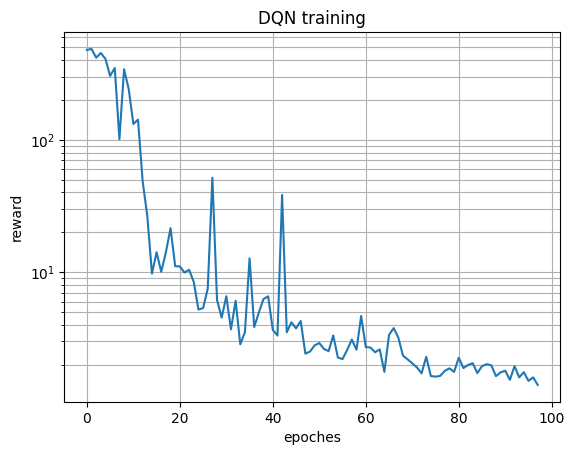

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
reward_history = np.array(reward_history)

smoothed_data = savgol_filter(reward_history, window_length=50, polyorder=3)

plt.figure()
plt.yscale('log')
plt.plot(-reward_history)
plt.xlabel('epoches')
plt.ylabel('reward')
plt.title('DQN training')
# min_value = 1e1
# max_value = 2e2
# plt.ylim(min_value, max_value)

# Display grid lines
plt.grid(which='both')

plt.show()


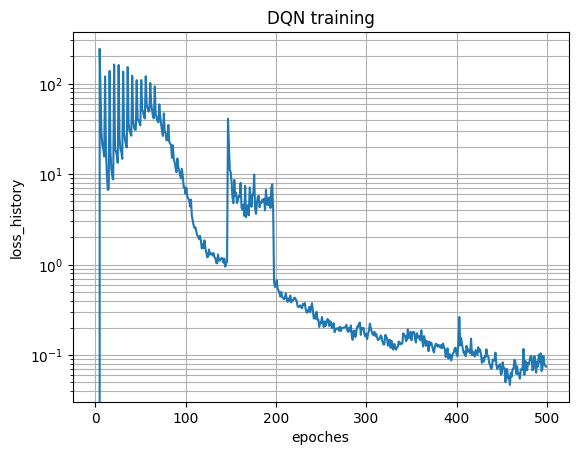

In [ ]:
loss_history = np.array(loss_history)

smoothed_data = savgol_filter(loss_history, window_length=5, polyorder=2)

plt.figure()
plt.yscale('log')
plt.plot(loss_history)
plt.xlabel('epoches')
plt.ylabel('loss_history')
plt.title('DQN training')
# min_value = 1e1
# max_value = 2e2
# plt.ylim(min_value, max_value)

# Display grid lines
plt.grid(which='both')

plt.show()

In [ ]:
loss_history[0]

0.0

To keep track of your experiments, it is good practice to plot and check how well is your model trained based on the returns vs episodes plot. With a large number of episodes, this  plot may look very jagged making it difficult to ascertain how well you are doing. We are proving code to smoothen out the plot by. This will take a large list of returns in every episode and plot a smoothened version of the list. Feel free to use it if it helps.
```
import seaborn as sns
returns = __
smoothing = 10

smoothened = [sum(returns[i:i+smoothing])/smoothing for i in range(0, len(returns), smoothing)]
sns.lineplot(smoothened)
```

### Load your model and test its performance
Change your model path and the goal to see how well your learnt model is performing

In [ ]:
import collections
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import time
from render import Renderer
from arm_env import ArmEnv
import numpy as np
import os
from math import dist
import seaborn as sns
from robot import Robot
from arm_dynamics import ArmDynamics
from geometry import polar2cartesian


# DO NOT CHANGE arm parameters
arm = Robot(
        ArmDynamics(
            num_links=2,
            link_mass=0.1,
            link_length=1,
            joint_viscous_friction=0.1,
            dt=0.01,
	    			gravity=False	    
        )
    )
arm.reset()
# ------------------

def sample_goal():
      goal = np.zeros((2,1))
      r = np.random.uniform(low=0.5, high=1.5)
      theta = np.random.uniform(low=-2/3 * np.pi, high=-1/3 *np.pi)
      goal[0,0] = r * np.cos(theta)
      goal[1,0] = r * np.sin(theta)
      return goal

goal_list = [polar2cartesian(1.8, 0.2 - np.pi / 2.0),
             polar2cartesian(1.9, -0.15 - np.pi / 2.0),
             polar2cartesian(1.6, 0.25 - np.pi / 2.0),
             polar2cartesian(1.8, -0.25 - np.pi / 2.0),
             polar2cartesian(1.6, 0.45 - np.pi / 2.0)]

env = ArmEnv(arm, gui=False)
# model_path = '/content/models/2023-05-03_19-46-41/q_network_ep_0460.pth' # Fill in the model_path
device = torch.device('cpu')
qnet = QNetwork(env).to(device)
# qnet.load_state_dict(torch.load(model_path))
# qnet.eval()
# goal = sample_goal()
# done = False
# obs = env.reset(goal)


num_points = 10
reward_history = []

model_dir = '/content/models/'
from tqdm import tqdm 
for epoch in tqdm(range(10, 500, 5)):
    model_folder = f'q_network_ep_{epoch:04d}.pth'
    model_path = os.path.join(model_dir, model_folder)
    # print(model_path)
    qnet.load_state_dict(torch.load(model_path))
    qnet.eval()

    episode_return = 0

    for i in range(5):
        goal = goal_list[i]
        done = False
        obs = env.reset(goal)

        while not done:
          action = qnet.select_discrete_action(obs, device)
          action = qnet.action_discrete_to_continuous(action)
          new_obs, reward, done, info = env.step(action)
          episode_return += reward

          # pos_ee = info['pos_ee']
          # vel_ee = info['vel_ee']
          # dist = np.linalg.norm(pos_ee - goal)

          obs = new_obs
        # print('Episode return: ', episode_return)
    reward_history.append(episode_return / num_points)

100%|██████████| 98/98 [01:37<00:00,  1.01it/s]


In [ ]:
goal_list = [polar2cartesian(1.8, 0.2 - np.pi / 2.0),
             polar2cartesian(1.9, -0.15 - np.pi / 2.0),
             polar2cartesian(1.6, 0.25 - np.pi / 2.0),
             polar2cartesian(1.8, -0.25 - np.pi / 2.0),
             polar2cartesian(1.6, 0.45 - np.pi / 2.0)]
goal = goal_list[0]
goal

array([[ 0.3576048 ],
       [-1.76411984]])

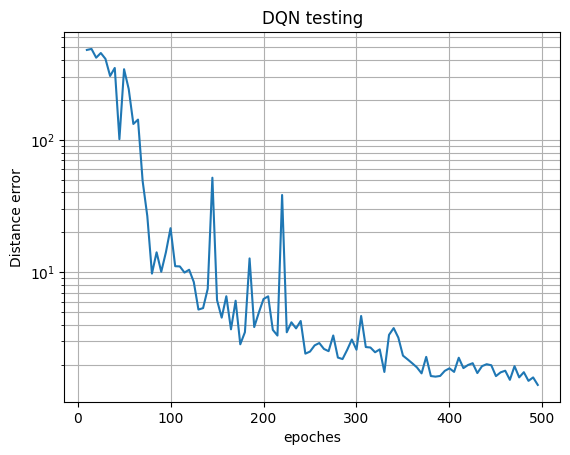

In [ ]:
reward_history = np.array(reward_history)

smoothed_data = savgol_filter(reward_history, window_length=5, polyorder=2)

plt.figure()
plt.yscale('log')
plt.plot(range(10, 500, 5), -reward_history)
plt.xlabel('epoches')
plt.ylabel('Distance error')
plt.title('DQN testing')
# min_value = 1e1
# max_value = 2e2
# plt.ylim(min_value, max_value)

# Display grid lines
plt.grid(which='both')

plt.show()

### Grading and Evaluation
You will be evaluated on 5 different goal positions worth 1.5 points each. You must pass the best `model_path` for your network. The scoring function will run one episode for every goal position and find the total reward (aka return) for the episode. For every goal you get:

* 1 Point if `easy target < total reward < hard target`
* 1.5 Points if `hard target < total reward`

In [ ]:
from score import compute_score
import torch.nn as nn
import torch
import torch.nn.functional as F
from render import Renderer
from arm_env import ArmEnv
from robot import Robot
from arm_dynamics import ArmDynamics
import numpy as np


# DO NOT CHANGE arm parameters
arm = Robot(
        ArmDynamics(
            num_links=2,
            link_mass=0.1,
            link_length=1,
            joint_viscous_friction=0.1,
            dt=0.01,
	    			gravity=False	    
        )
    )
arm.reset()
# ------------------

env = ArmEnv(arm, gui=False)

# train the model is about 5 mins, you can use any model from the last five eps (495 - 499), They should all have a full mark

model_path = '/content/models/q_network_ep_0120.pth' # Fill in the model_path
device = torch.device('cpu')
qnet = QNetwork(env).to(device)
qnet.load_state_dict(torch.load(model_path))
qnet.eval()
score = compute_score(qnet, env, device)

---Computing score---

Goal 1:
Total reward: -9.06662099999511
easy target: -7
hard target: -5
points: 0

Goal 2:
Total reward: -28.284415928381403
easy target: -7
hard target: -5
points: 0

Goal 3:
Total reward: -25.471368555913166
easy target: -7
hard target: -5
points: 0

Goal 4:
Total reward: -30.89865531344848
easy target: -7
hard target: -5
points: 0

Goal 5:
Total reward: -36.76409207461504
easy target: -10
hard target: -7
points: 0


Final score: 0


# Part 2: PPO with an open source RL library

In this part, you will use one of the most popular open source RL libraries ([Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/)) to solve the same goal reaching problem as Part 1. We will use the same `ArmEnv` gym environment. The algorithm you should choose to use is PPO. 

## PPO training

We provide the code to construct parallel environments. Parallel environments can be very useful if you have good CPUs and it can speed up training. 

In [ ]:
# DO NOT CHANGE

from stable_baselines3.common.vec_env.subproc_vec_env import SubprocVecEnv
from stable_baselines3.common.vec_env.vec_monitor import VecMonitor
from copy import deepcopy
from robot import Robot
from arm_dynamics import ArmDynamics
from arm_env import ArmEnv

class EnvMaker:
    def __init__(self,  arm, seed):
        self.seed = seed
        self.arm = arm

    def __call__(self):
        arm = deepcopy(self.arm)
        env = ArmEnv(arm)
        env.seed(self.seed)
        return env

def make_vec_env(arm, nenv, seed):
    return VecMonitor(SubprocVecEnv([EnvMaker(arm, seed  + 100 * i) for i in range(nenv)]))

# conveniet function to create a robot arm
def make_arm():
    arm = Robot(
        ArmDynamics(
            num_links=2,
            link_mass=0.1,
            link_length=1,
            joint_viscous_friction=0.1,
            dt=0.01
        )
    )
    arm.reset()
    return arm


You will need to complete the code to train the policy using the [PPO class](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html) from stable_baselines3. We provide the code to generate the name of the directory to save the checkpoint, an example is `ppo_models/2023-04-13_01-14-13`. Your checkpoint model should be named `ppo_network.zip`. See the [save](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#stable_baselines3.ppo.PPO.save) function. Training should take less than 40 minutes.

In [ ]:

from stable_baselines3.ppo import PPO
import os
import time
from stable_baselines3.common.utils import set_random_seed


# Default parameters
timesteps = 500000
nenv = 8  # number of parallel environments. This can speed up training when you have good CPUs
seed = 8
batch_size = 1024

# Generate path of the directory to save the checkpoint
# timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
# save_dir = os.path.join('ppo_models')
save_dir  = f'ppo_models_{i:04d}'
# Set random seed
set_random_seed(seed)

# Create arm
arm = make_arm()

# Create parallel envs
vec_env = make_vec_env(arm=arm, nenv=nenv, seed=seed)

# Create the PPO model
model = PPO("MlpPolicy", vec_env, n_steps=batch_size) # ent_coef=0.0, learning_rate=2.5e-4, vf_coef=0.5, max_grad_norm=0.5, gae_lambda=0.95, n_epochs=4, clip_range=0.2, clip_range_vf=None, verbose=1, seed=seed)

# Train the model
model.learn(total_timesteps=timesteps)

# Save the model
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
model.save(os.path.join(save_dir, "ppo_network.zip"))


In [ ]:
import os
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import VecNormalize
from stable_baselines3.common.callbacks import BaseCallback

# Default parameters
timesteps = 500000
nenv = 8
seed = 8
batch_size = 1024
save_interval = 500

save_dir = f'ppo_models_4'
set_random_seed(seed)

arm = make_arm()

vec_env = make_vec_env(arm=arm, nenv=nenv, seed=seed)

model = PPO("MlpPolicy", vec_env, n_steps=batch_size)

class SaveIntermediateModelCallback(BaseCallback):
    def __init__(self, save_interval, save_dir):
        super(SaveIntermediateModelCallback, self).__init__()
        self.save_interval = save_interval
        self.save_dir = save_dir

    def _on_step(self) -> bool:
        if self.n_calls % self.save_interval == 0:
            save_path = os.path.join(self.save_dir, f"ppo_network_step_{self.n_calls}.zip")
            self.model.save(save_path)
            print(f"Saved model at time step {self.n_calls}")
        return True

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

save_callback = SaveIntermediateModelCallback(save_interval, save_dir)

model.learn(total_timesteps=timesteps, callback=save_callback)


Saved model at time step 500
Saved model at time step 1000
Saved model at time step 1500
Saved model at time step 2000
Saved model at time step 2500
Saved model at time step 3000
Saved model at time step 3500
Saved model at time step 4000
Saved model at time step 4500
Saved model at time step 5000
Saved model at time step 5500
Saved model at time step 6000
Saved model at time step 6500
Saved model at time step 7000
Saved model at time step 7500
Saved model at time step 8000
Saved model at time step 8500
Saved model at time step 9000
Saved model at time step 9500
Saved model at time step 10000
Saved model at time step 10500
Saved model at time step 11000
Saved model at time step 11500
Saved model at time step 12000
Saved model at time step 12500
Saved model at time step 13000
Saved model at time step 13500
Saved model at time step 14000
Saved model at time step 14500
Saved model at time step 15000
Saved model at time step 15500
Saved model at time step 16000
Saved model at time step 165

## Grading and evaluation

The total number of points for Part 2 is 7.5. We will evaluate your trained model on 5 random goal locations. For each test, we assign points based on the distance between the end effector and the goal location at the end of the episode.

- If 0 < distance < 0.05, you get 1.5 points.
- If 0.05 <= distance < 0.1, you get 1 point.
- If distance >= 0.1, you get 0 point.



In [ ]:
from score import score_policy
from stable_baselines3 import PPO
from stable_baselines3.common.utils import set_random_seed
from robot import Robot
from arm_dynamics import ArmDynamics
from render import Renderer
import time

# Set the path to your model
model_path = '/content/ppo_models_4/ppo_network_step_13500.zip'

set_random_seed(seed=100)

# Create arm robot
arm = make_arm()

# Create environment
env = ArmEnv(arm, gui=False)
env.seed(100)

# Load and test policy
policy = PPO.load(model_path)
score_policy(policy, env)


--- Computing score ---

Goal 1: 0

Goal 2: 1

Goal 3: 0

Goal 4: 1.5

Goal 5: 0


---
Final score: 2.5/7.5
---


2.5

In [ ]:


def test_policy(policy, env, goal):
    env.reset()
    env.set_goal(goal)
    env.arm.reset()  # force arm to be in vertical configuration
    # import ipdb; ipdb.set_trace()
    obs, rewards, done, info = env.step(env.action_space.sample() * 0)
    while True:
        action, _states = policy.predict(obs, deterministic=True)
        obs, rewards, done, info = env.step(action)
        if done:
            break
    state = env.arm.get_state()
    pos_ee = env.arm.dynamics.compute_fk(state)
    dist = np.linalg.norm((pos_ee - goal))
    return dist

# Create arm robot
arm = make_arm()

# Create environment
env = ArmEnv(arm, gui=False)
env.seed(100)


start = 500
end = 63000
step = 500

score_history = []
for i in tqdm(range(start, end + step, step)):
    model_path = f'/content/ppo_models_4/ppo_network_step_{i}.zip'

    set_random_seed(seed=100)


    # Load and test policy
    policy = PPO.load(model_path)
        
    score = 0
        
    goal = polar2cartesian(1.8, 0.2 - np.pi / 2.0)
    score += test_policy(policy, env, goal)


    goal = polar2cartesian(1.9, -0.15 - np.pi / 2.0)
    score += test_policy(policy, env, goal)


    goal = polar2cartesian(1.6, 0.25 - np.pi / 2.0)
    score += test_policy(policy, env, goal)


    goal = polar2cartesian(1.8, -0.25 - np.pi / 2.0)
    score += test_policy(policy, env, goal)


    goal = polar2cartesian(1.6, 0.45 - np.pi / 2.0)
    score += test_policy(policy, env, goal)
    score_history.append(score)





100%|██████████| 126/126 [02:54<00:00,  1.39s/it]


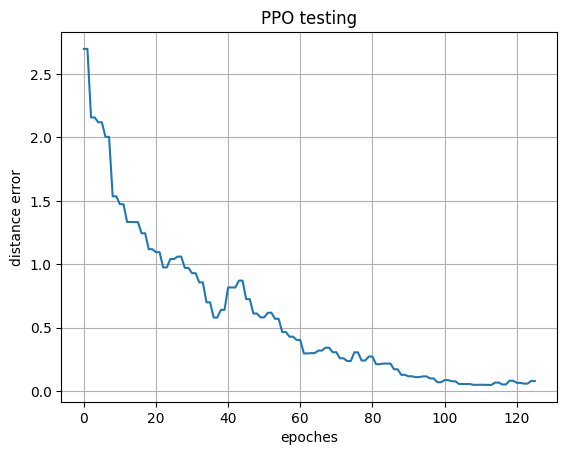

In [ ]:
score_history = np.array(score_history)

smoothed_data = savgol_filter(score_history, window_length=5, polyorder=2)

plt.figure()
# plt.yscale('log')
plt.plot(score_history)
plt.xlabel('epoches')
plt.ylabel('distance error')
plt.title('PPO testing')
# min_value = 1e1
# max_value = 2e2
# plt.ylim(min_value, max_value)

# Display grid lines
plt.grid(which='both')

plt.show()